# Trend Analysis of Weekly Drug Sales

This section focuses on identifying the **overall trend** of weekly sales for each drug category. The analysis combines **rolling mean smoothing** and **linear regression** to highlight the trend direction and magnitude.

**How to read the plots and insights below:**

- **Blue Line (Observed):** The raw weekly sales data.  
- **Orange Line (12-week Rolling Mean):** Smooths short-term fluctuations to reveal medium-term trends.  
- **Green Dashed Line (Linear Trend):** Linear regression line fitted to the entire series to show overall trend direction.

**Trend Insight:**

- **Increasing 📈:** Sales are rising consistently over time.  
- **Decreasing 📉:** Sales are falling consistently over time.  
- **Stable ➖:** Sales are relatively constant; slope is within a small threshold (`trend_threshold`) indicating negligible change.  

This visualization and metric help in understanding **long-term growth, decline, or stability** in sales, supporting inventory planning, forecasting, and strategic decisions.


M01AB trend: Increasing 📈


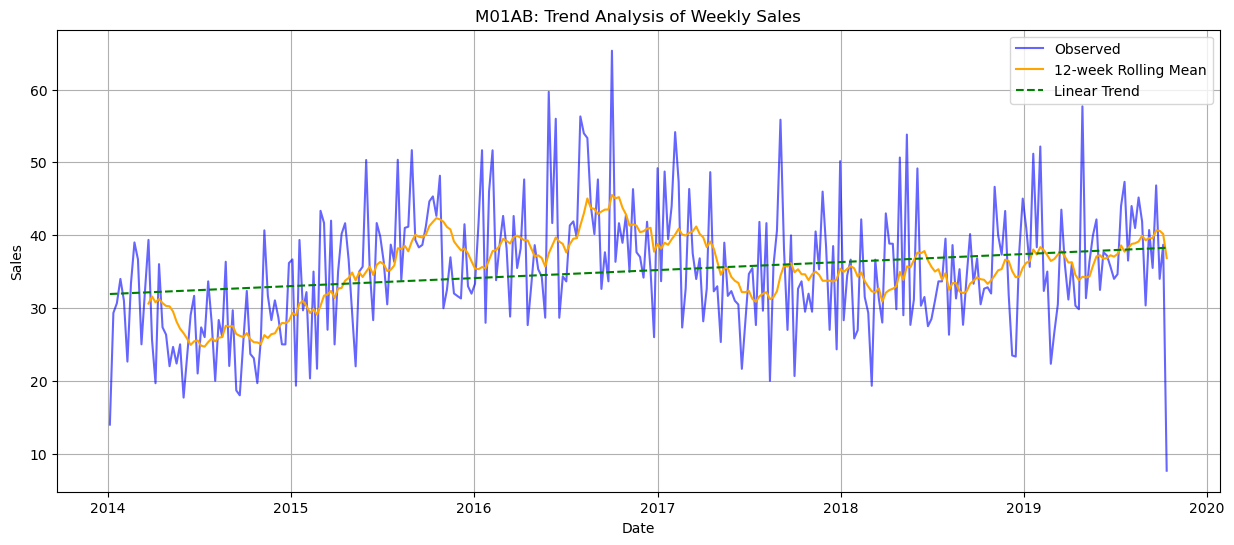

M01AE trend: Stable ➖


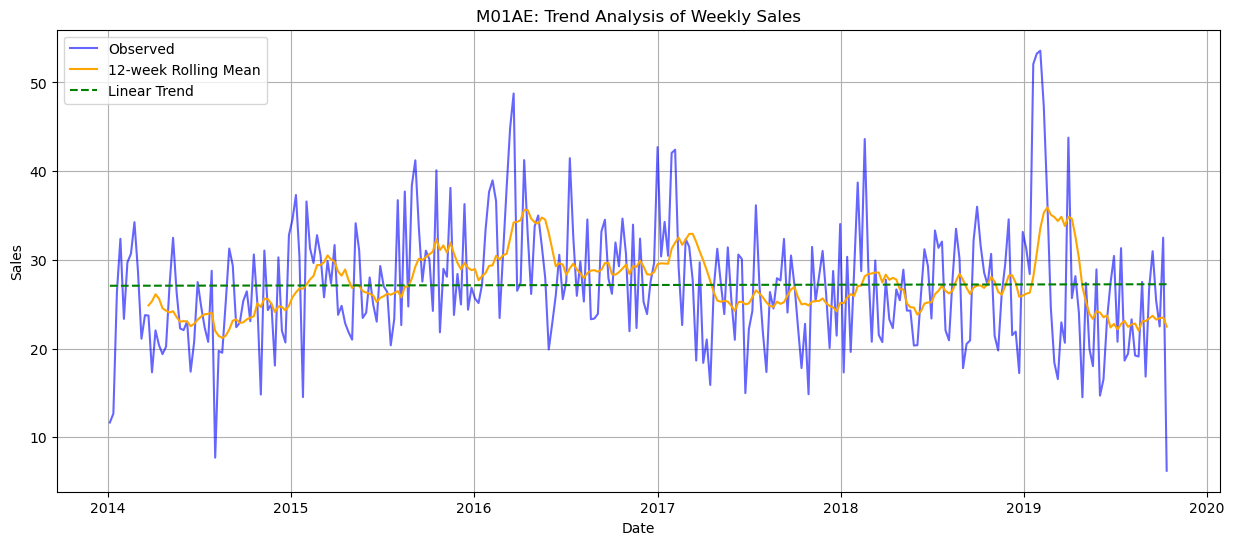

N02BA trend: Decreasing 📉


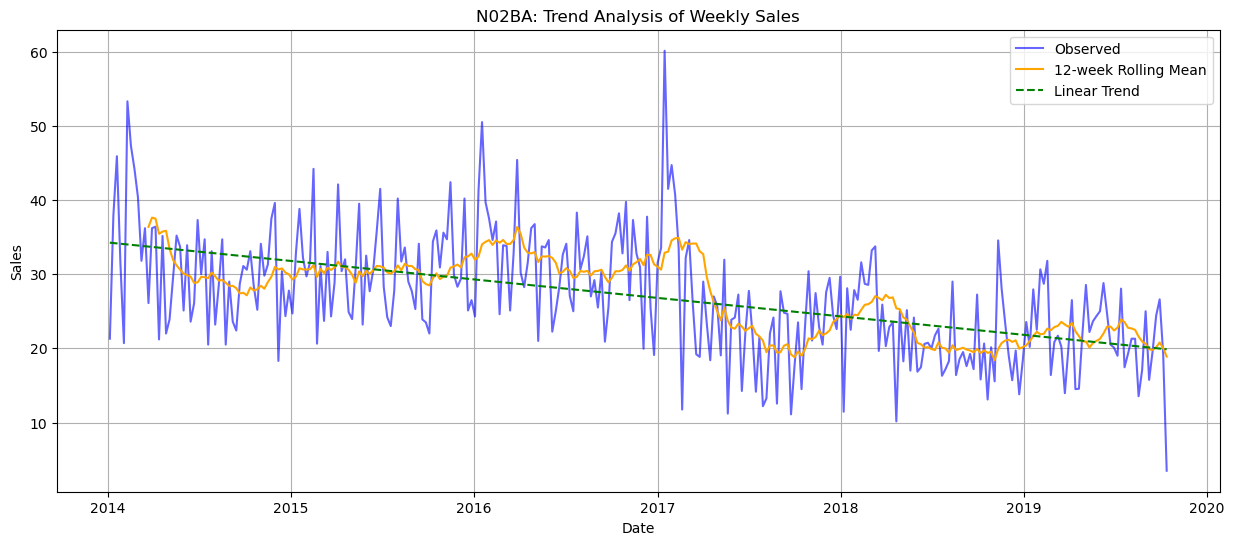

N02BE trend: Stable ➖


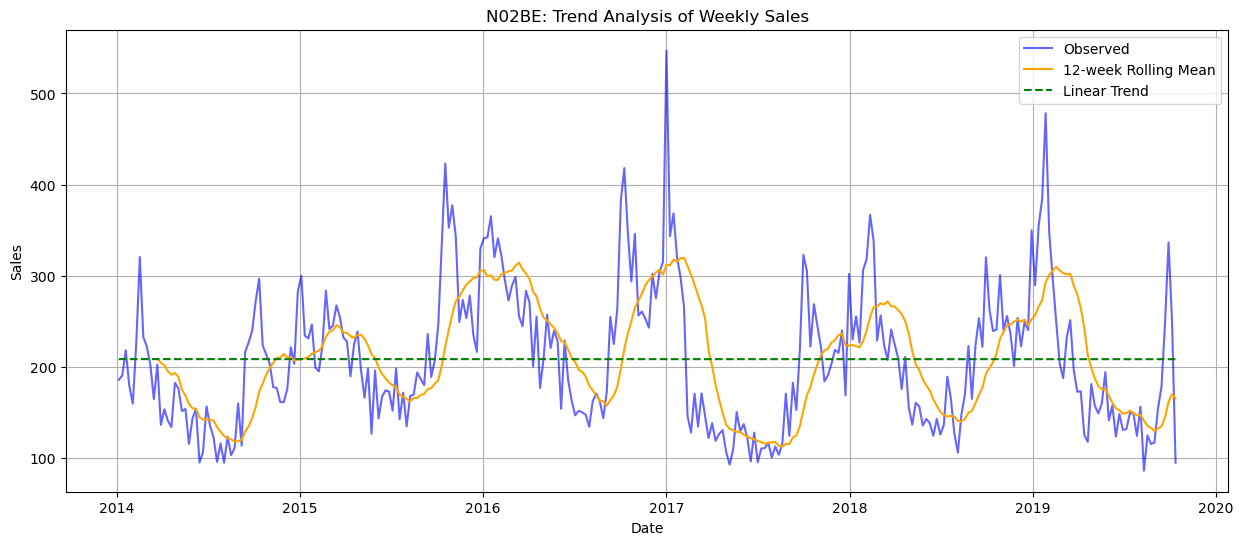

N05B trend: Decreasing 📉


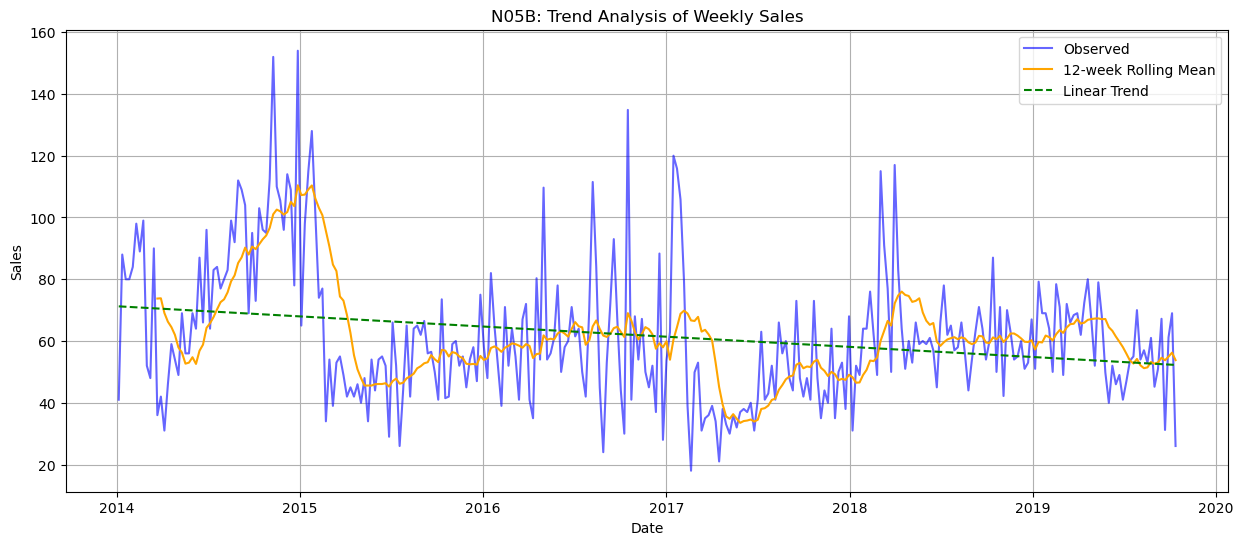

N05C trend: Stable ➖


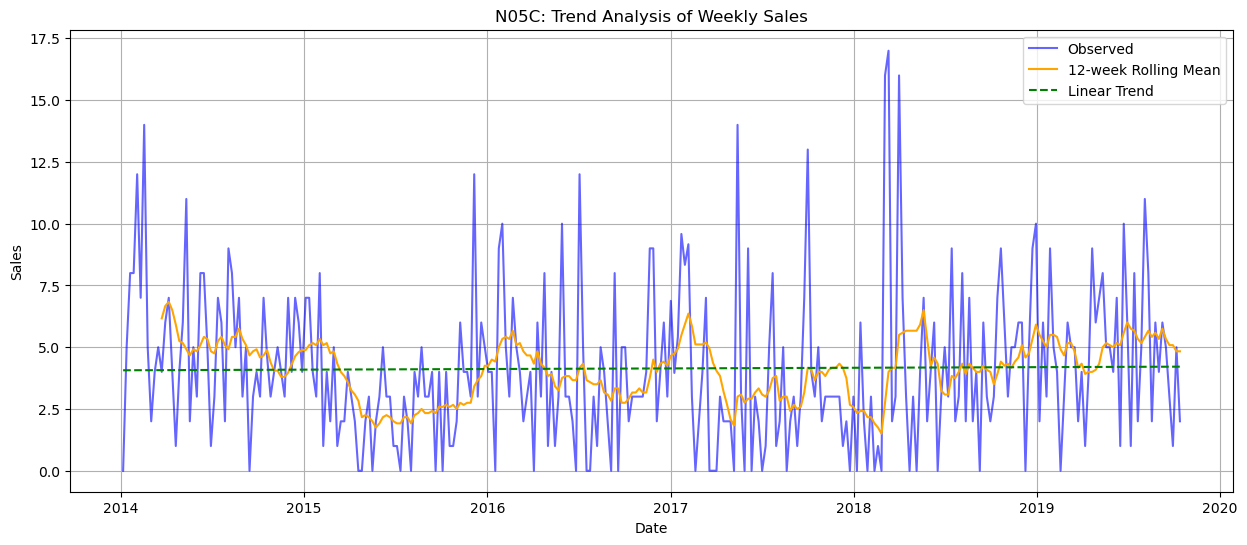

R03 trend: Increasing 📈


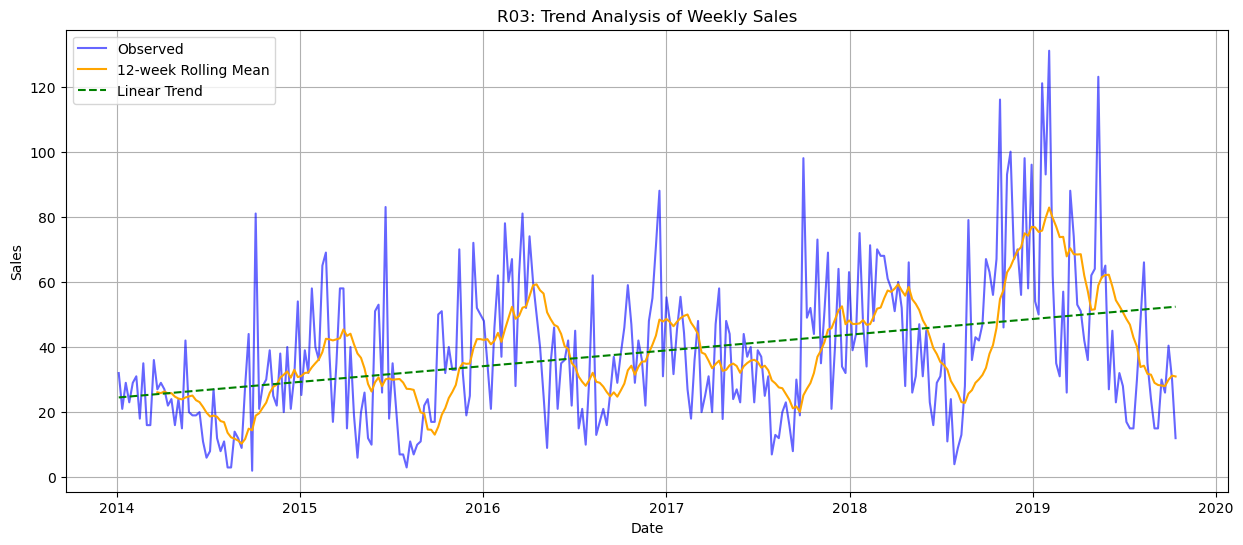

R06 trend: Increasing 📈


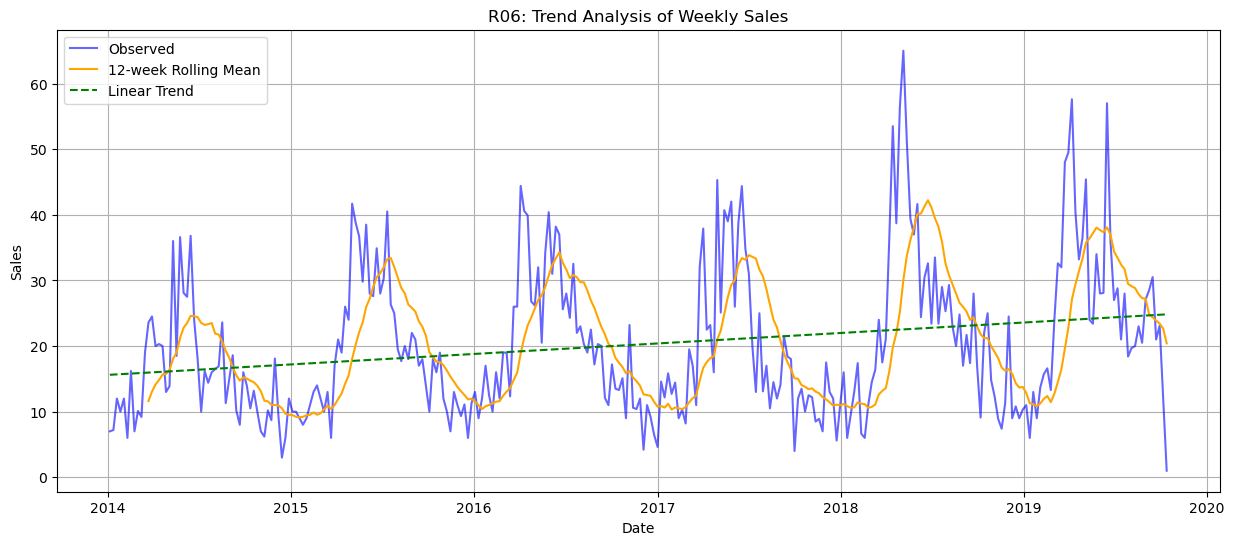

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load weekly dataset
df = pd.read_csv("E://pharma_forcast//data//salesweekly_old.csv", parse_dates=["datum"])
df.set_index("datum", inplace=True)

categories = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]  # Can loop over multiple categories later
trend_threshold = 0.001  # Slope threshold to consider as stable

for cat in categories:
    series = df[cat]

    # -----------------------------
    # Rolling Mean Trend
    # -----------------------------
    rolling_mean = series.rolling(window=12).mean()

    # -----------------------------
    # Linear Regression Trend
    # -----------------------------
    x = np.arange(len(series)).reshape(-1,1)
    y = series.values
    lr = LinearRegression().fit(x, y)
    trend_line = lr.predict(x)
    trend_slope = lr.coef_[0]

    # -----------------------------
    # Trend Direction Insight with threshold
    # -----------------------------
    if abs(trend_slope) < trend_threshold:
        trend_text = "Stable ➖"
    elif trend_slope > 0:
        trend_text = "Increasing 📈"
    else:
        trend_text = "Decreasing 📉"

    print(f"{cat} trend: {trend_text}")

    # -----------------------------
    # Plotting
    # -----------------------------
    plt.figure(figsize=(15,6))
    plt.plot(series.index, series, label='Observed', color='blue', alpha=0.6)
    plt.plot(series.index, rolling_mean, label='12-week Rolling Mean', color='orange')
    plt.plot(series.index, trend_line, label='Linear Trend', color='green', linestyle='--')
    plt.title(f"{cat}: Trend Analysis of Weekly Sales")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.show()


# Seasonality Analysis

This section visualizes and analyzes the **weekly seasonal patterns** of drug sales. The analysis decomposes the sales series into trend, seasonal, and residual components, and then focuses on the **seasonal component** to identify recurring patterns throughout the year.

**How to read the plots and insights below:**

- **Scatter Plot of Weekly Seasonal Component:**  
  - **Green points**: Weeks where sales are significantly higher than average (**peak weeks**).  
  - **Red points**: Weeks where sales are significantly lower than average (**low weeks**).  
  - **Blue points**: Weeks with average sales (within ±1 standard deviation of the mean).  
  - Gray line: Connects all points to show the overall seasonal pattern visually.

- **Insights Table/Printout:**  
  - **Peak weeks**: Week numbers where sales tend to spike.  
  - **Low weeks**: Week numbers where sales are lower than normal.  
  - **Seasonality strength**: Categorized as Weak, Moderate, or Strong based on the number of peak weeks.

This analysis helps in understanding **which weeks consistently perform better or worse** across years, providing actionable insights for inventory planning, promotions, or demand forecasting.

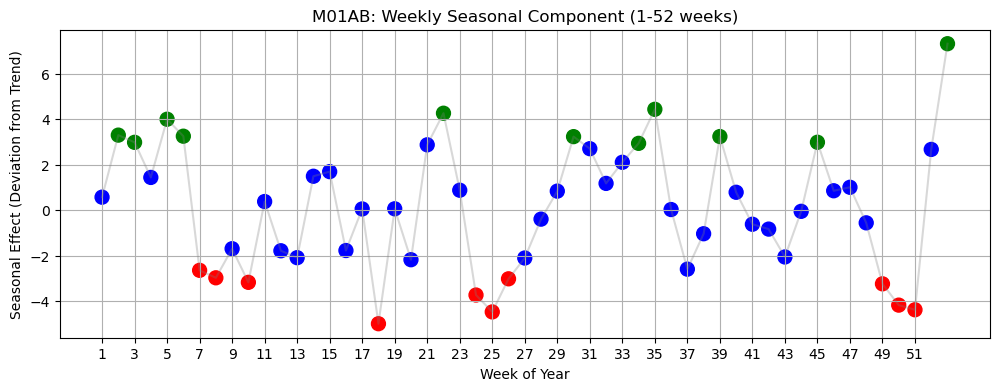


## M01AB Weekly Seasonality Insights
- Peak weeks (higher than average): [2, 3, 5, 6, 22, 30, 34, 35, 39, 45, 53]
- Low weeks (lower than average): [7, 8, 10, 18, 24, 25, 26, 49, 50, 51]
- Seasonality strength: Strong seasonality
--------------------------------------------------


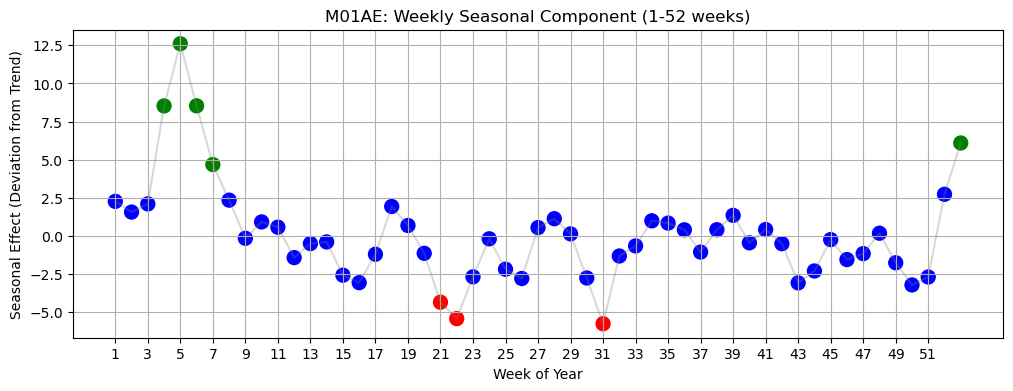


## M01AE Weekly Seasonality Insights
- Peak weeks (higher than average): [4, 5, 6, 7, 53]
- Low weeks (lower than average): [21, 22, 31]
- Seasonality strength: Weak seasonality
--------------------------------------------------


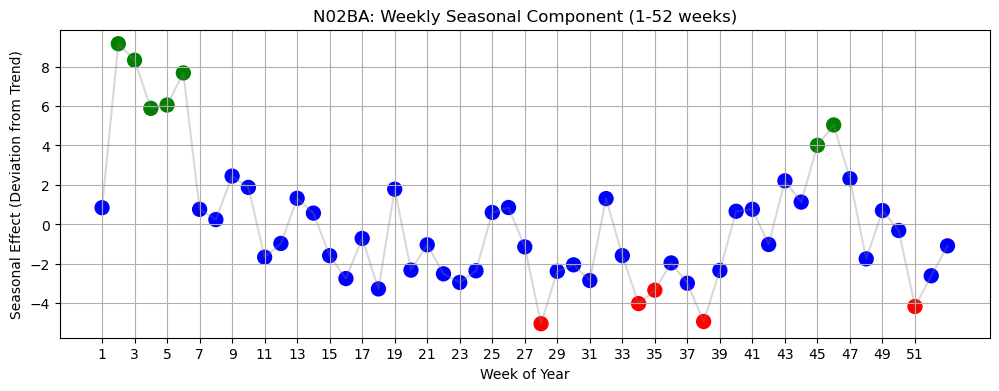


## N02BA Weekly Seasonality Insights
- Peak weeks (higher than average): [2, 3, 4, 5, 6, 45, 46]
- Low weeks (lower than average): [28, 34, 35, 38, 51]
- Seasonality strength: Moderate seasonality
--------------------------------------------------


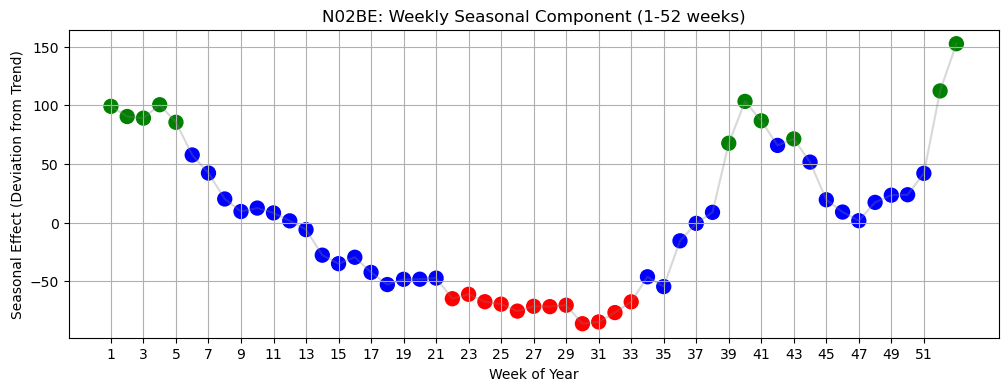


## N02BE Weekly Seasonality Insights
- Peak weeks (higher than average): [1, 2, 3, 4, 5, 39, 40, 41, 43, 52, 53]
- Low weeks (lower than average): [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
- Seasonality strength: Strong seasonality
--------------------------------------------------


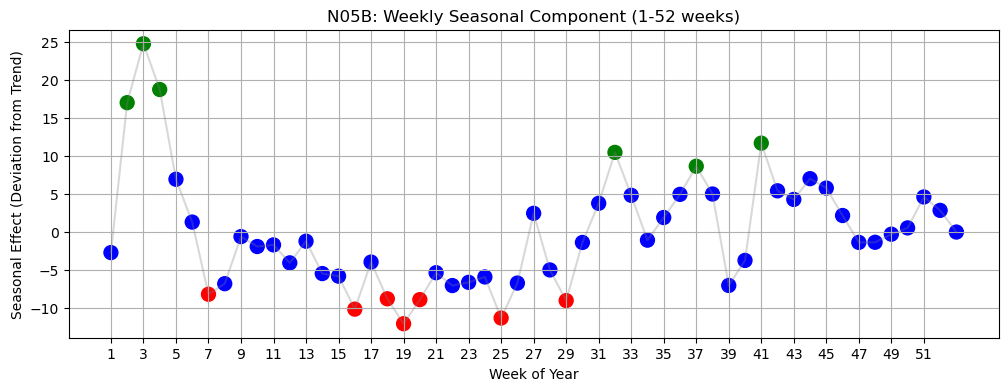


## N05B Weekly Seasonality Insights
- Peak weeks (higher than average): [2, 3, 4, 32, 37, 41]
- Low weeks (lower than average): [7, 16, 18, 19, 20, 25, 29]
- Seasonality strength: Moderate seasonality
--------------------------------------------------


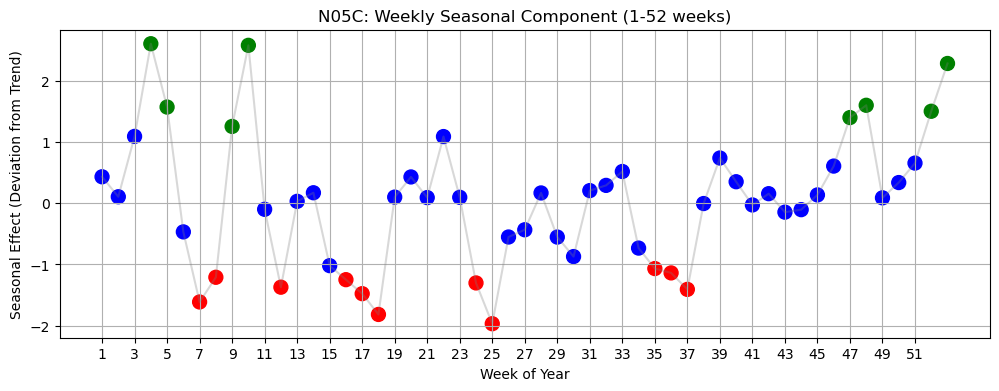


## N05C Weekly Seasonality Insights
- Peak weeks (higher than average): [4, 5, 9, 10, 47, 48, 52, 53]
- Low weeks (lower than average): [7, 8, 12, 16, 17, 18, 24, 25, 35, 36, 37]
- Seasonality strength: Moderate seasonality
--------------------------------------------------


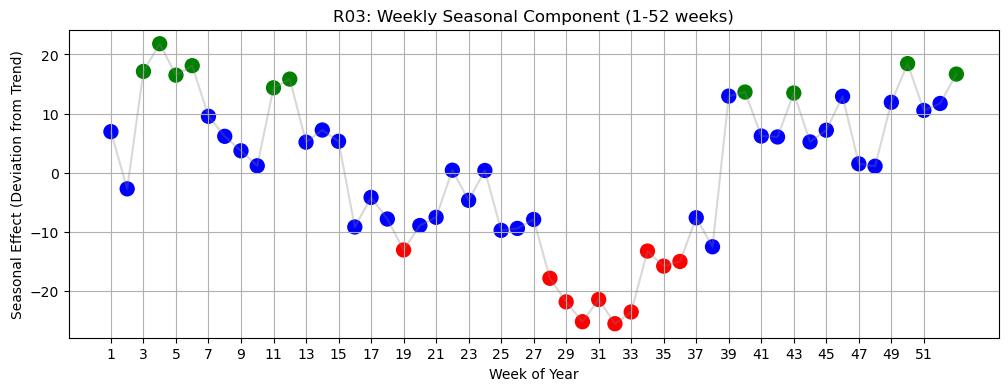


## R03 Weekly Seasonality Insights
- Peak weeks (higher than average): [3, 4, 5, 6, 11, 12, 40, 43, 50, 53]
- Low weeks (lower than average): [19, 28, 29, 30, 31, 32, 33, 34, 35, 36]
- Seasonality strength: Moderate seasonality
--------------------------------------------------


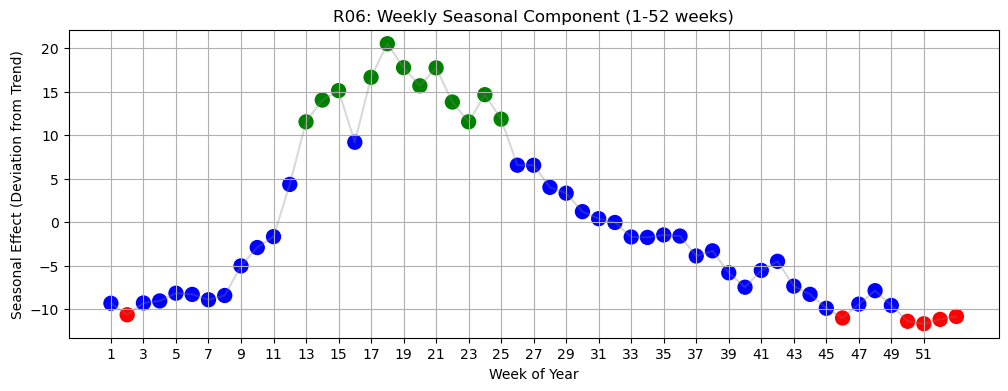


## R06 Weekly Seasonality Insights
- Peak weeks (higher than average): [13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25]
- Low weeks (lower than average): [2, 46, 50, 51, 52, 53]
- Seasonality strength: Strong seasonality
--------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load weekly dataset
df = pd.read_csv("E://pharma_forcast//data//salesweekly_old.csv", parse_dates=["datum"])
df.set_index("datum", inplace=True)

categories = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]

for cat in categories:
    series = df[cat]

    # Seasonal decomposition
    decomp = seasonal_decompose(series, model="additive", period=52)
    seasonal = decomp.seasonal

    # Create week-of-year
    df_week = series.reset_index()
    df_week['Week'] = df_week['datum'].dt.isocalendar().week
    df_week['Year'] = df_week['datum'].dt.year
    df_week['Seasonal'] = seasonal.values

    # Average seasonal effect per week
    seasonal_by_week = df_week.groupby('Week')['Seasonal'].mean()

    # Identify peaks/troughs
    mean_s = seasonal_by_week.mean()
    std_s = seasonal_by_week.std()
    top_weeks = seasonal_by_week[seasonal_by_week > mean_s + std_s].index.tolist()
    low_weeks = seasonal_by_week[seasonal_by_week < mean_s - std_s].index.tolist()

    # Plot seasonal component with colors
    colors = ['green' if w in top_weeks else 'red' if w in low_weeks else 'blue' for w in seasonal_by_week.index]
    plt.figure(figsize=(12,4))
    plt.scatter(seasonal_by_week.index, seasonal_by_week.values, c=colors, s=100, label='Seasonal Effect')
    plt.plot(seasonal_by_week.index, seasonal_by_week.values, color='gray', alpha=0.3)  # connect points
    plt.title(f"{cat}: Weekly Seasonal Component (1-52 weeks)")
    plt.xlabel("Week of Year")
    plt.ylabel("Seasonal Effect (Deviation from Trend)")
    plt.xticks(range(1,53,2))
    plt.grid(True)
    plt.show()

    # Insights
    print(f"\n## {cat} Weekly Seasonality Insights")
    print(f"- Peak weeks (higher than average): {top_weeks}")
    print(f"- Low weeks (lower than average): {low_weeks}")

    # Optional: categorize seasonality strength
    if len(top_weeks) > 10:
        seasonality_strength = "Strong seasonality"
    elif len(top_weeks) > 5:
        seasonality_strength = "Moderate seasonality"
    else:
        seasonality_strength = "Weak seasonality"
    print(f"- Seasonality strength: {seasonality_strength}")
    print("-"*50)


# Distribution, Autocorrelation & Stationarity Analysis

This section examines the **distributional characteristics** of weekly sales, the **autocorrelation structure**, and the **stationarity** of the time series.

**How to interpret the insights below:**

---

### 1️⃣ Distribution
- **Histogram + KDE:** Shows the frequency of sales values across weeks.
- **Skewness:** 
  - Positive → right-skewed (more low sales, occasional high spikes).  
  - Negative → left-skewed (more high sales, occasional low dips).  
  - Near zero → roughly symmetric distribution.
- **Kurtosis:**  
  - > 3 → heavy tails (extreme sales events occur more often)  
  - ≤ 3 → light tails (sales concentrated around the mean).

**Takeaways:**  
- Identify if the series has frequent extreme sales events.  
- Helps assess if log transforms or normalization might improve modeling.

---

### 2️⃣ Autocorrelation (ACF) & Partial Autocorrelation (PACF)
- **ACF:** Measures correlation of sales with previous weeks.
  - High lag-1 ACF → trend is present.  
  - Significant lag-52 ACF → yearly (seasonal) pattern.
- **PACF:** Measures correlation with past weeks after removing intermediate effects.
  - Significant PACF lags → potential autoregressive effects.

**Takeaways:**  
- Strong correlations suggest predictable patterns → useful for AR/ARIMA models.  
- Weak correlations → week-to-week sales are mostly random.

---

### 3️⃣ Stationarity
- **ADF (Augmented Dickey-Fuller) Test:**  
  - p-value < 0.05 → stationary  
  - p-value ≥ 0.05 → non-stationary
- **KPSS Test:**  
  - p-value > 0.05 → stationary  
  - p-value ≤ 0.05 → non-stationary

**Takeaways:**  
- Stationary series → easier to model and forecast.  
- Non-stationary series → may require differencing, log-transform, or detrending before modeling.

---

**Overall Insights to Look For:**
- Trend vs random week-to-week fluctuations.  
- Presence of strong seasonality (weekly, yearly).  
- Lags that could inform forecasting models (AR/ARIMA/seasonal components).  
- Distribution shape for detecting unusual or extreme sales events.


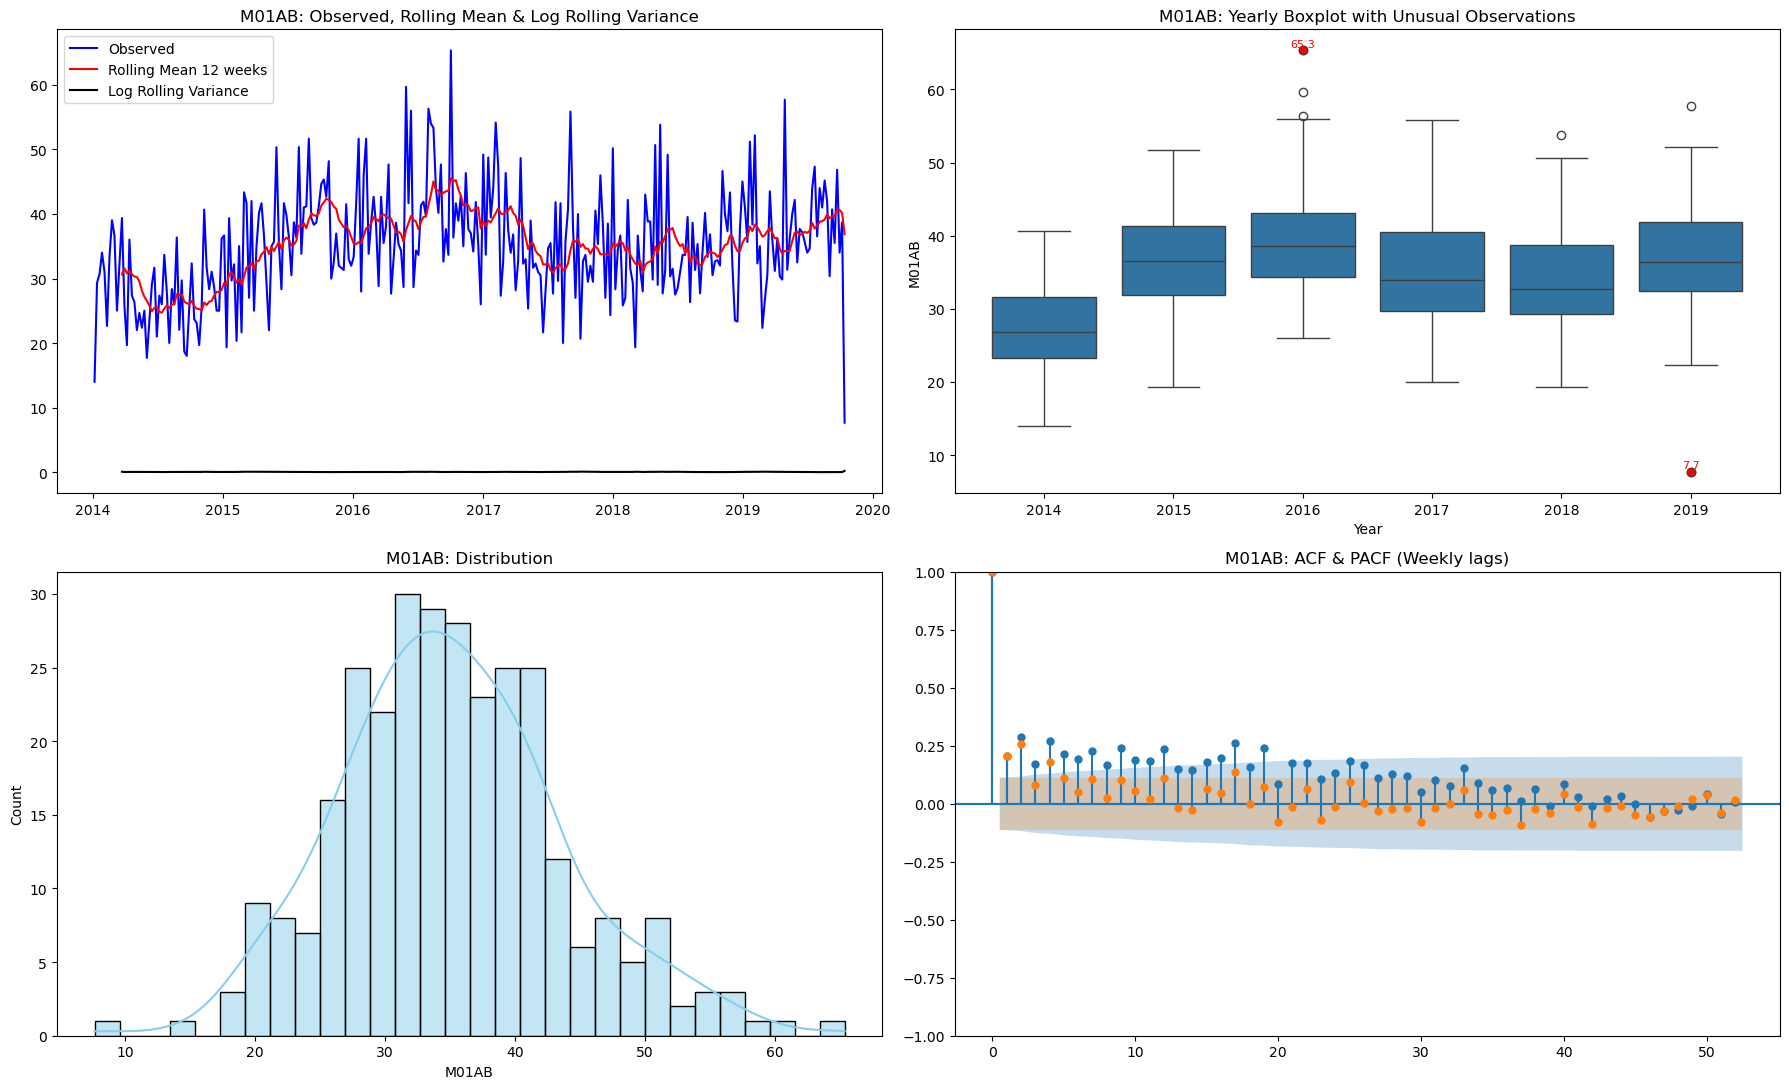

M01AB: Series is non-stationary ❌

Unusual observations for M01AB:
Date: 2016-10-02, Sales: 65.33
Date: 2019-10-13, Sales: 7.67

Relatively symmetric distribution
Light tails: sales more concentrated around mean

M01AB weak correlation with previous week → mostly random week-to-week
M01AB no strong partial correlations at early lags


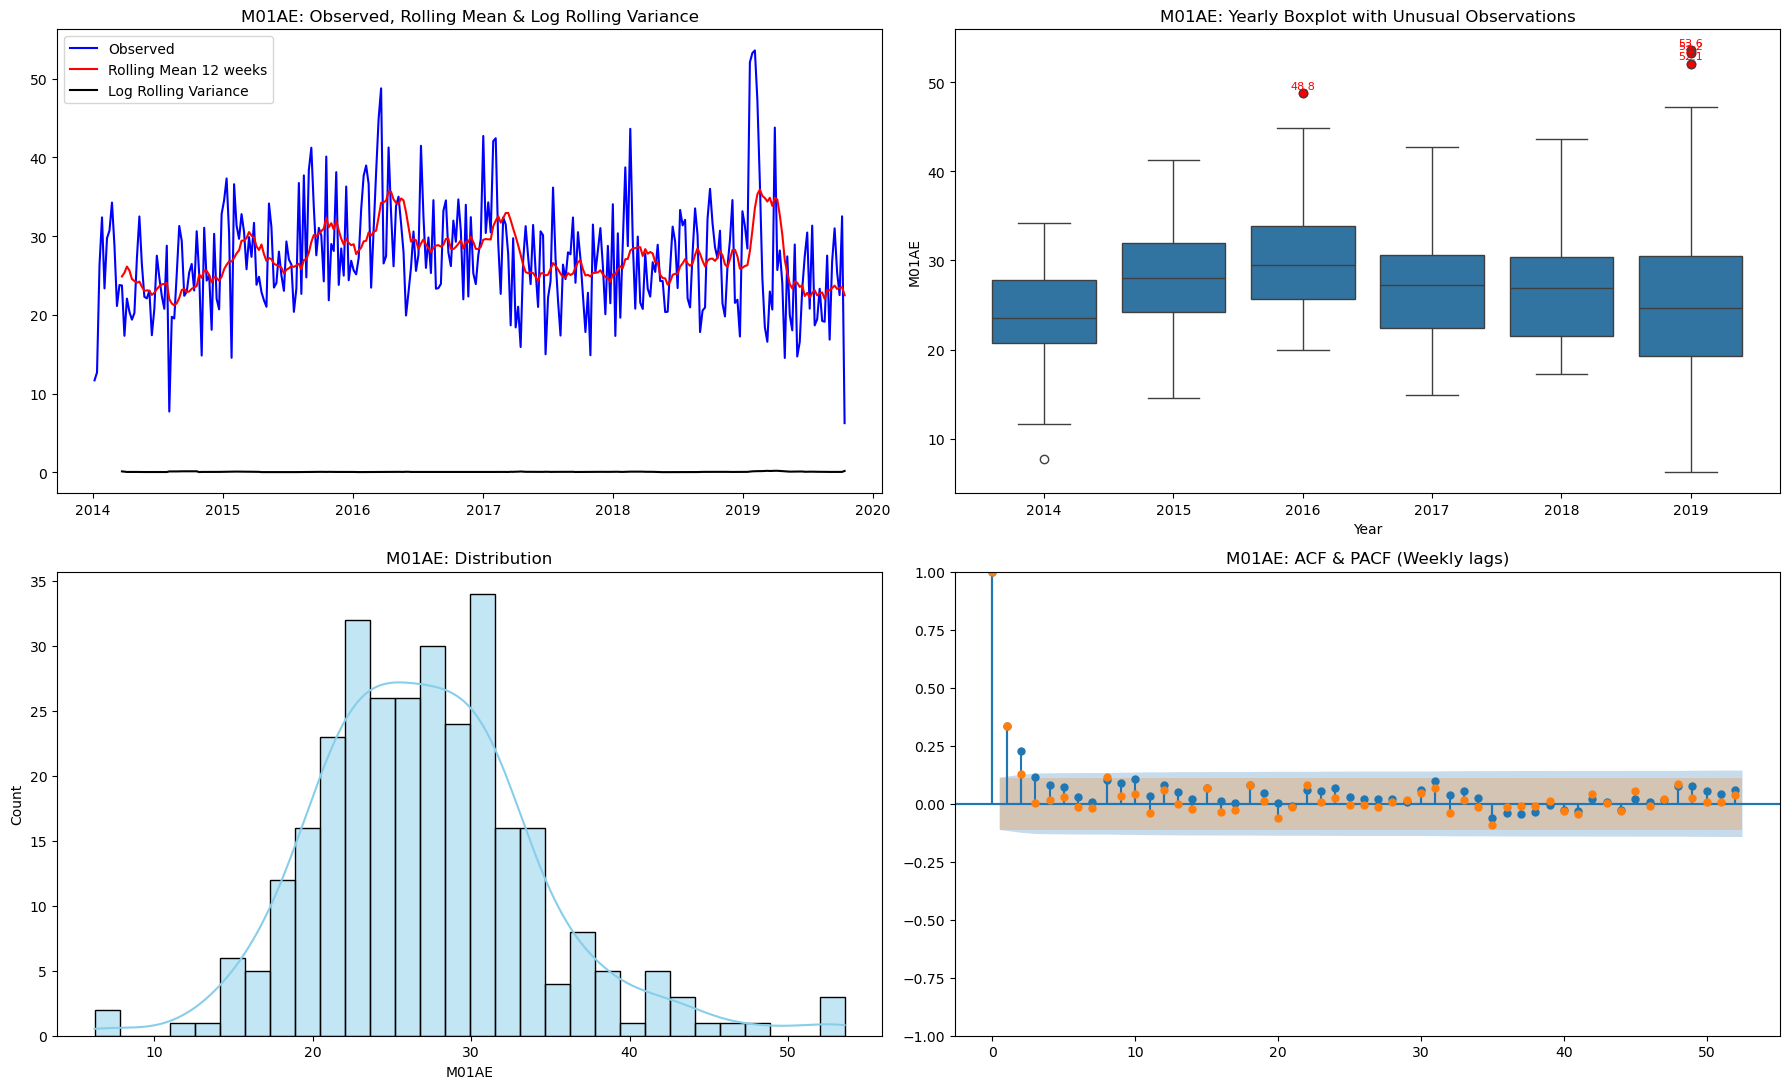

M01AE: Series is stationary ✅

Unusual observations for M01AE:
Date: 2016-03-20, Sales: 48.75
Date: 2019-01-20, Sales: 52.07
Date: 2019-01-27, Sales: 53.24
Date: 2019-02-03, Sales: 53.57

Right-skewed: more frequent lower sales, occasional high spikes
Light tails: sales more concentrated around mean

M01AE weak correlation with previous week → mostly random week-to-week
M01AE strong partial correlations at lags: [1]


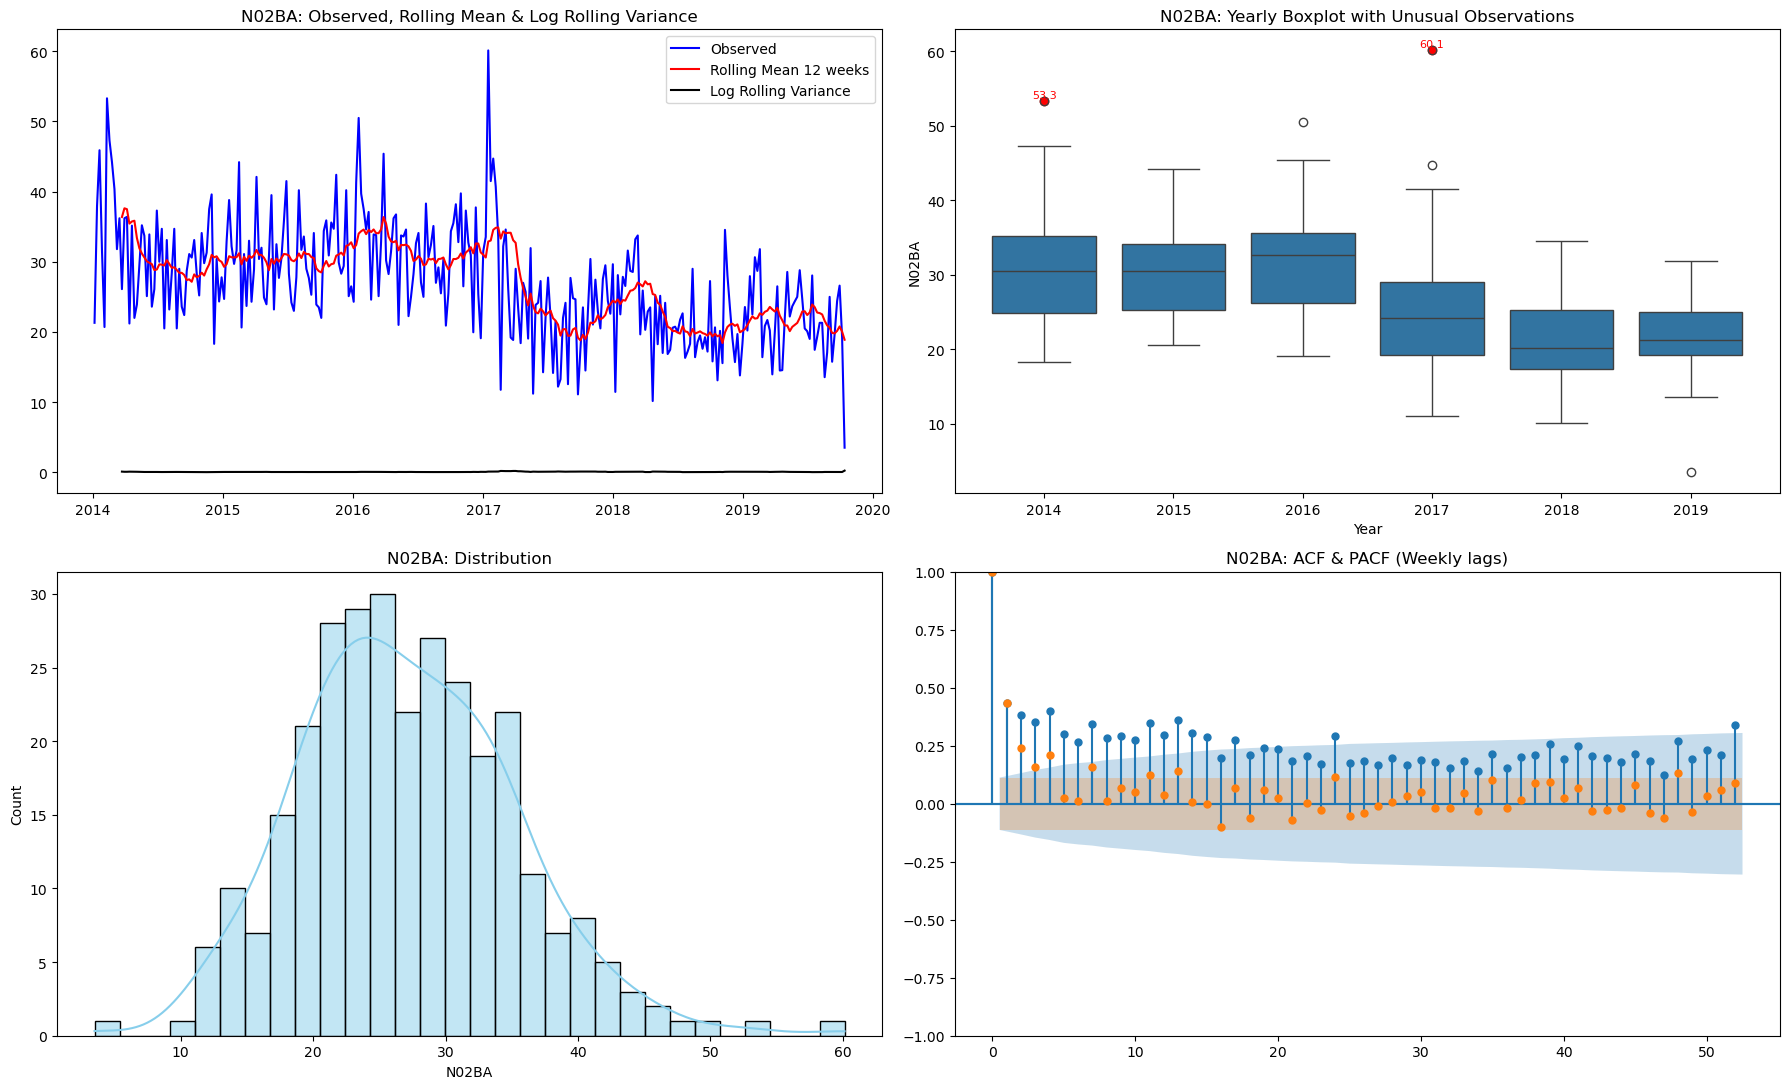

N02BA: Series is non-stationary ❌

Unusual observations for N02BA:
Date: 2014-02-09, Sales: 53.30
Date: 2017-01-15, Sales: 60.12

Relatively symmetric distribution
Light tails: sales more concentrated around mean

N02BA weak correlation with previous week → mostly random week-to-week
N02BA strong partial correlations at lags: [1]
N02BA shows signs of long-term seasonality


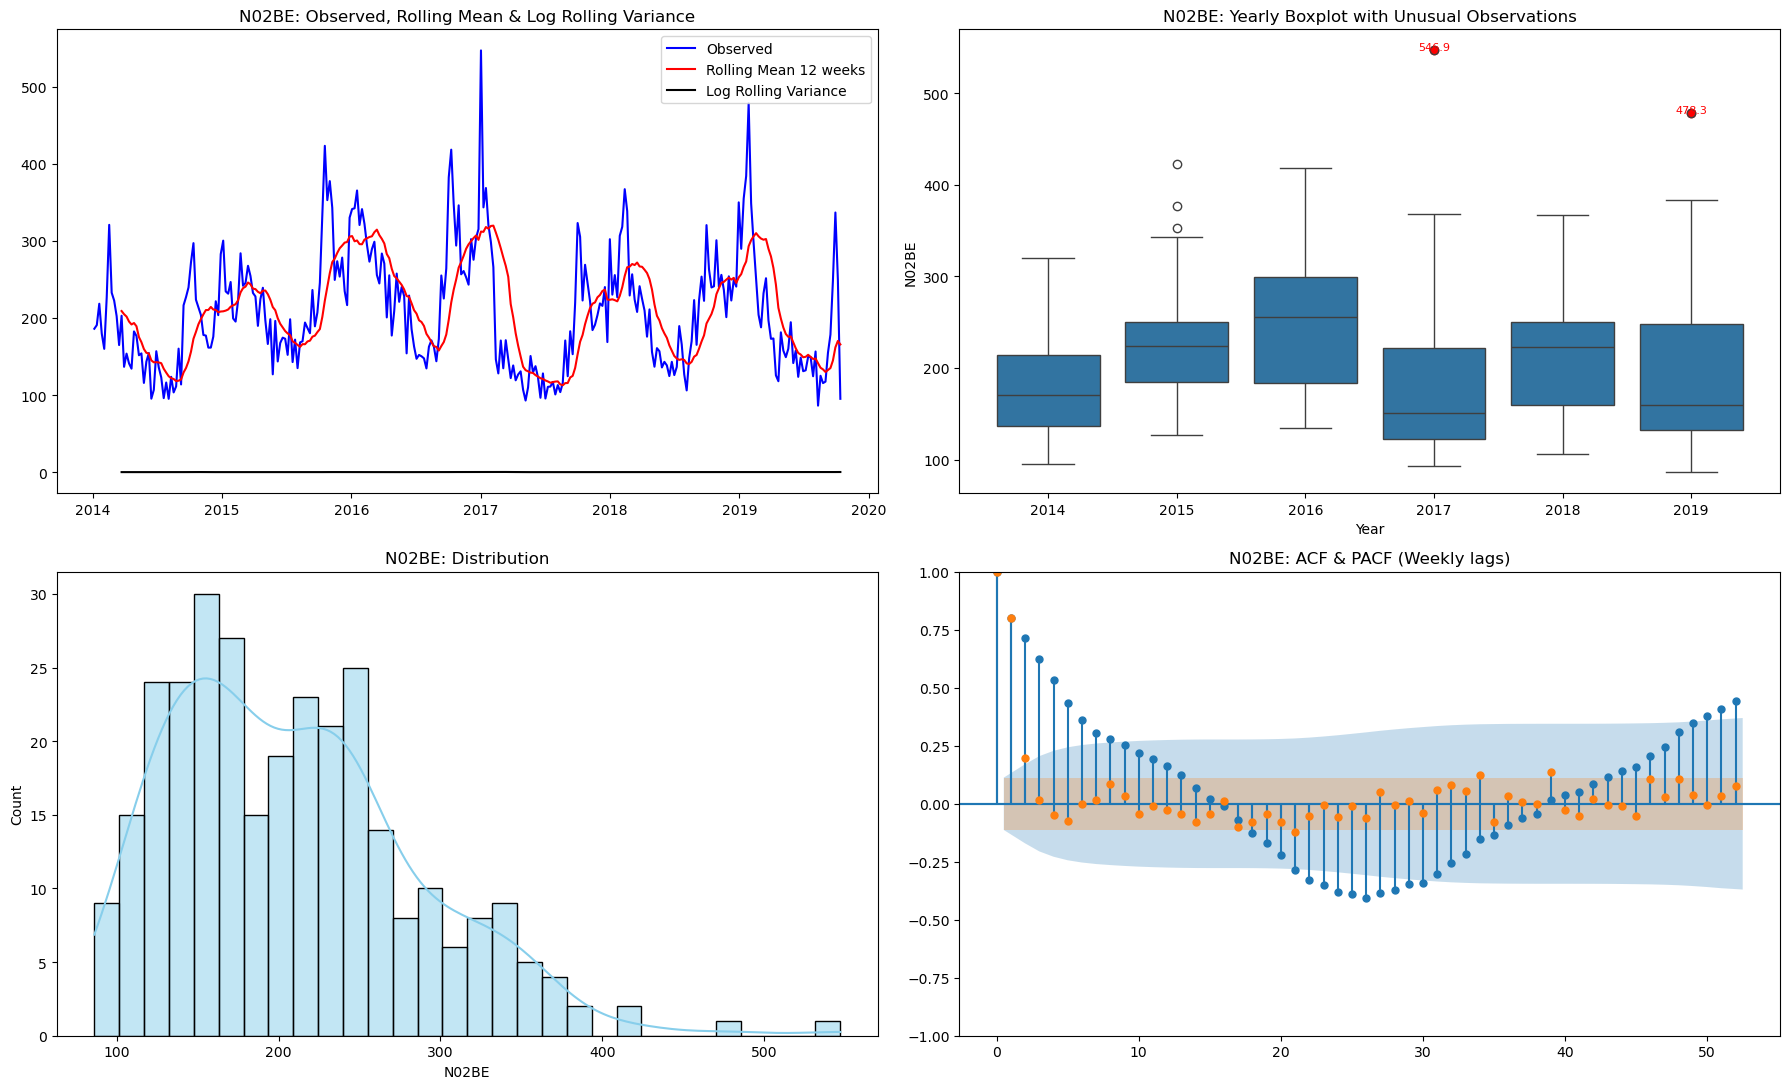

N02BE: Series is stationary ✅

Unusual observations for N02BE:
Date: 2017-01-01, Sales: 546.90
Date: 2019-01-27, Sales: 478.30

Right-skewed: more frequent lower sales, occasional high spikes
Light tails: sales more concentrated around mean

N02BE has strong correlation with previous week → trend present
N02BE strong partial correlations at lags: [1]
N02BE shows signs of long-term seasonality


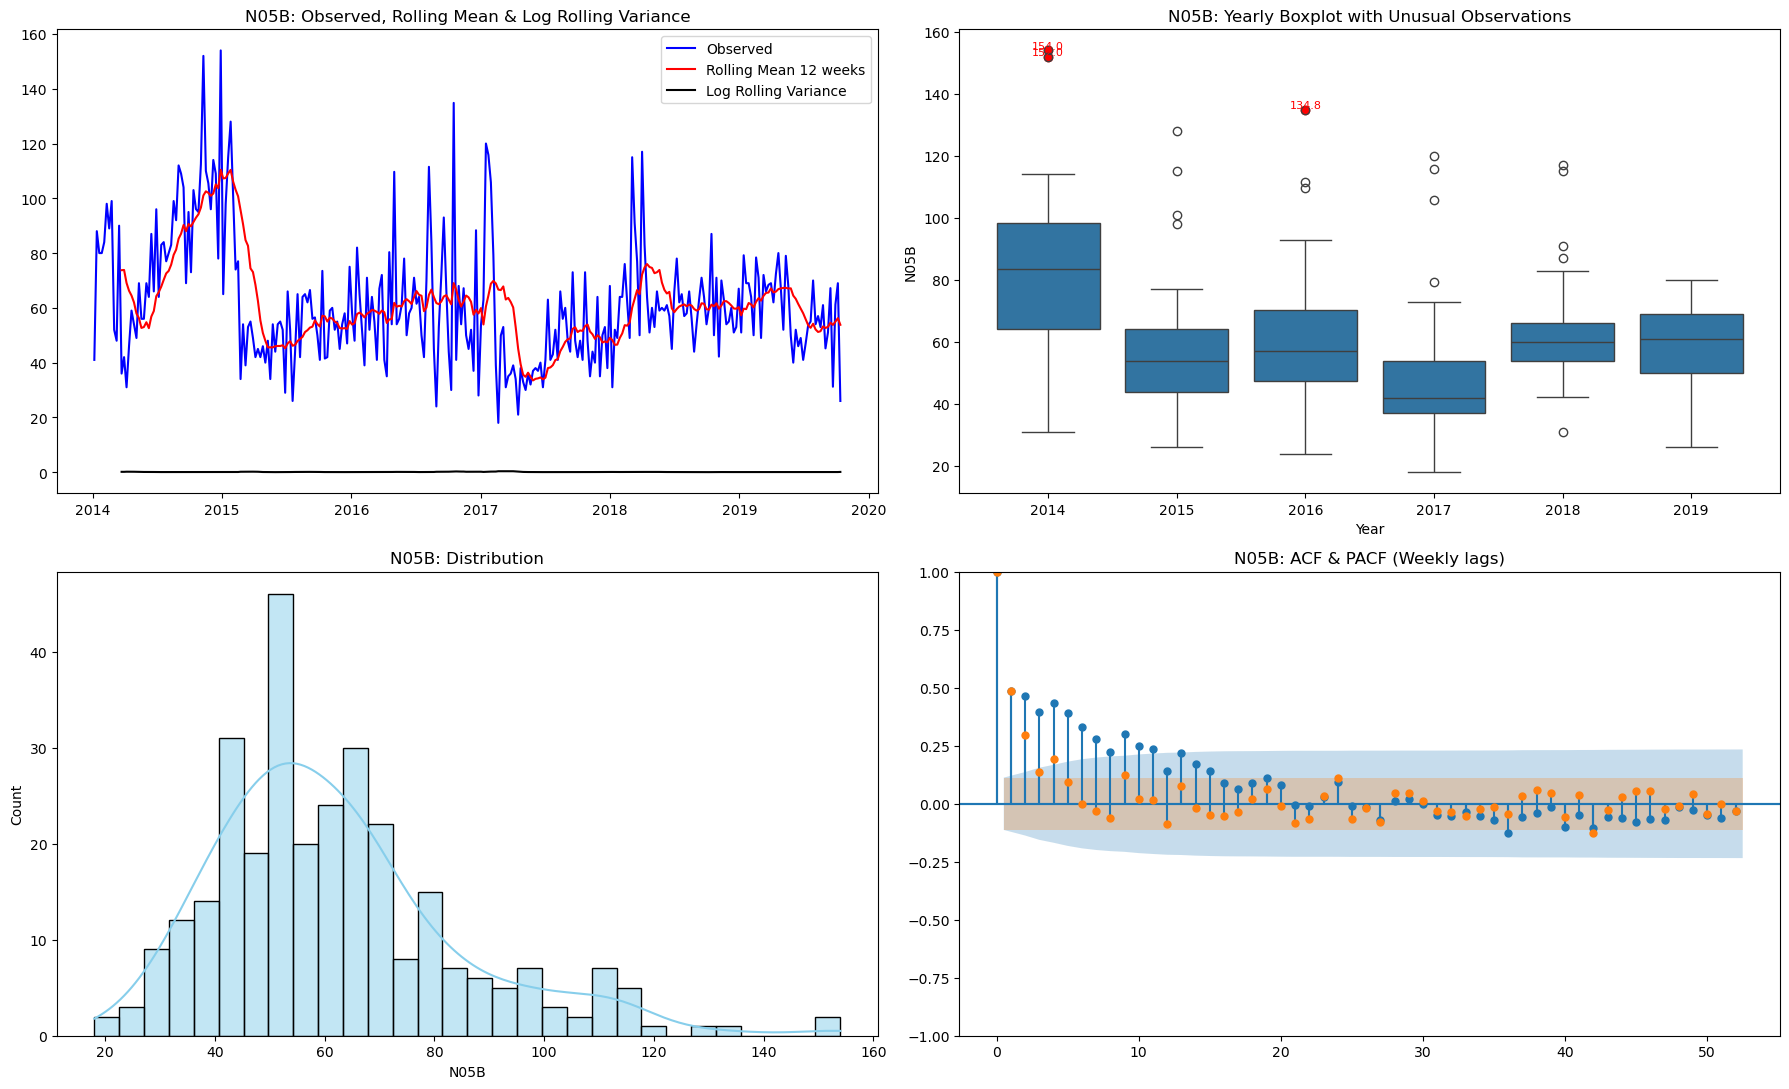

N05B: Series is non-stationary ❌

Unusual observations for N05B:
Date: 2014-11-09, Sales: 152.00
Date: 2014-12-28, Sales: 154.00
Date: 2016-10-16, Sales: 134.83

Right-skewed: more frequent lower sales, occasional high spikes
Light tails: sales more concentrated around mean

N05B weak correlation with previous week → mostly random week-to-week
N05B strong partial correlations at lags: [1]


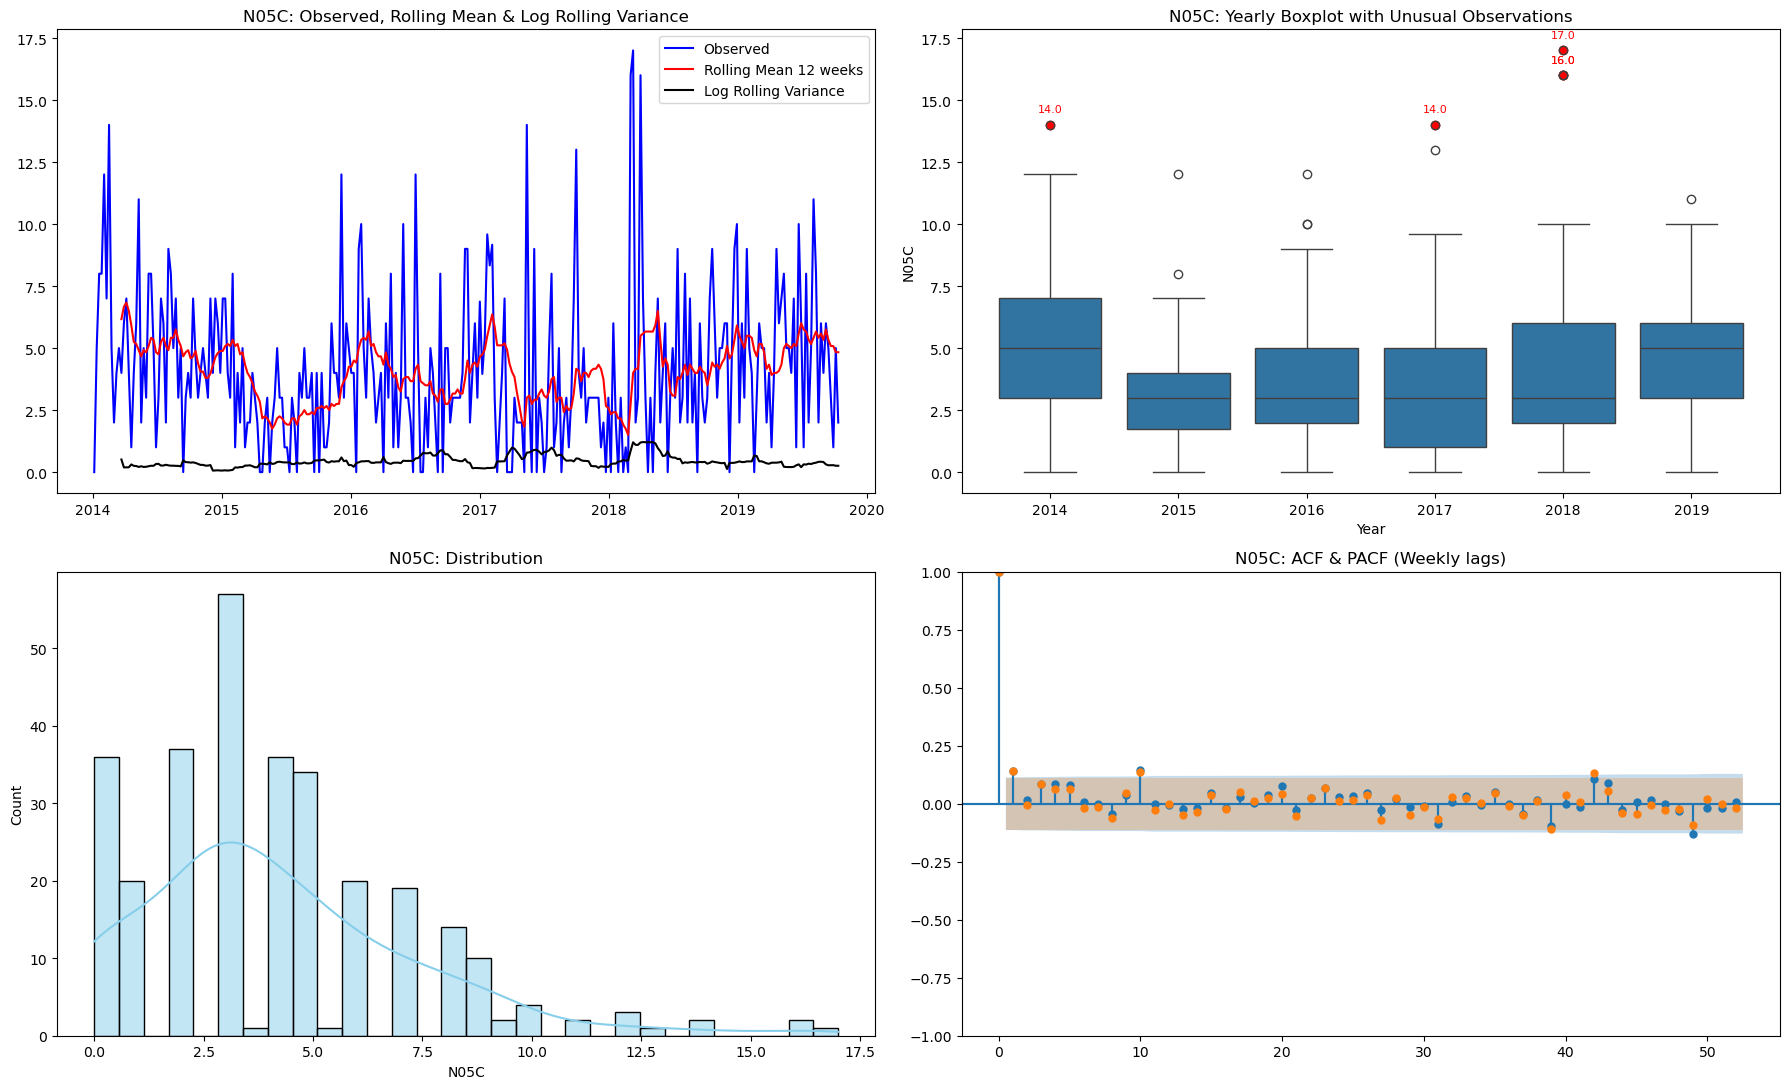

N05C: Series is stationary ✅

Unusual observations for N05C:
Date: 2014-02-16, Sales: 14.00
Date: 2017-05-14, Sales: 14.00
Date: 2018-03-04, Sales: 16.00
Date: 2018-03-11, Sales: 17.00
Date: 2018-04-01, Sales: 16.00

Right-skewed: more frequent lower sales, occasional high spikes
Light tails: sales more concentrated around mean

N05C weak correlation with previous week → mostly random week-to-week
N05C no strong partial correlations at early lags


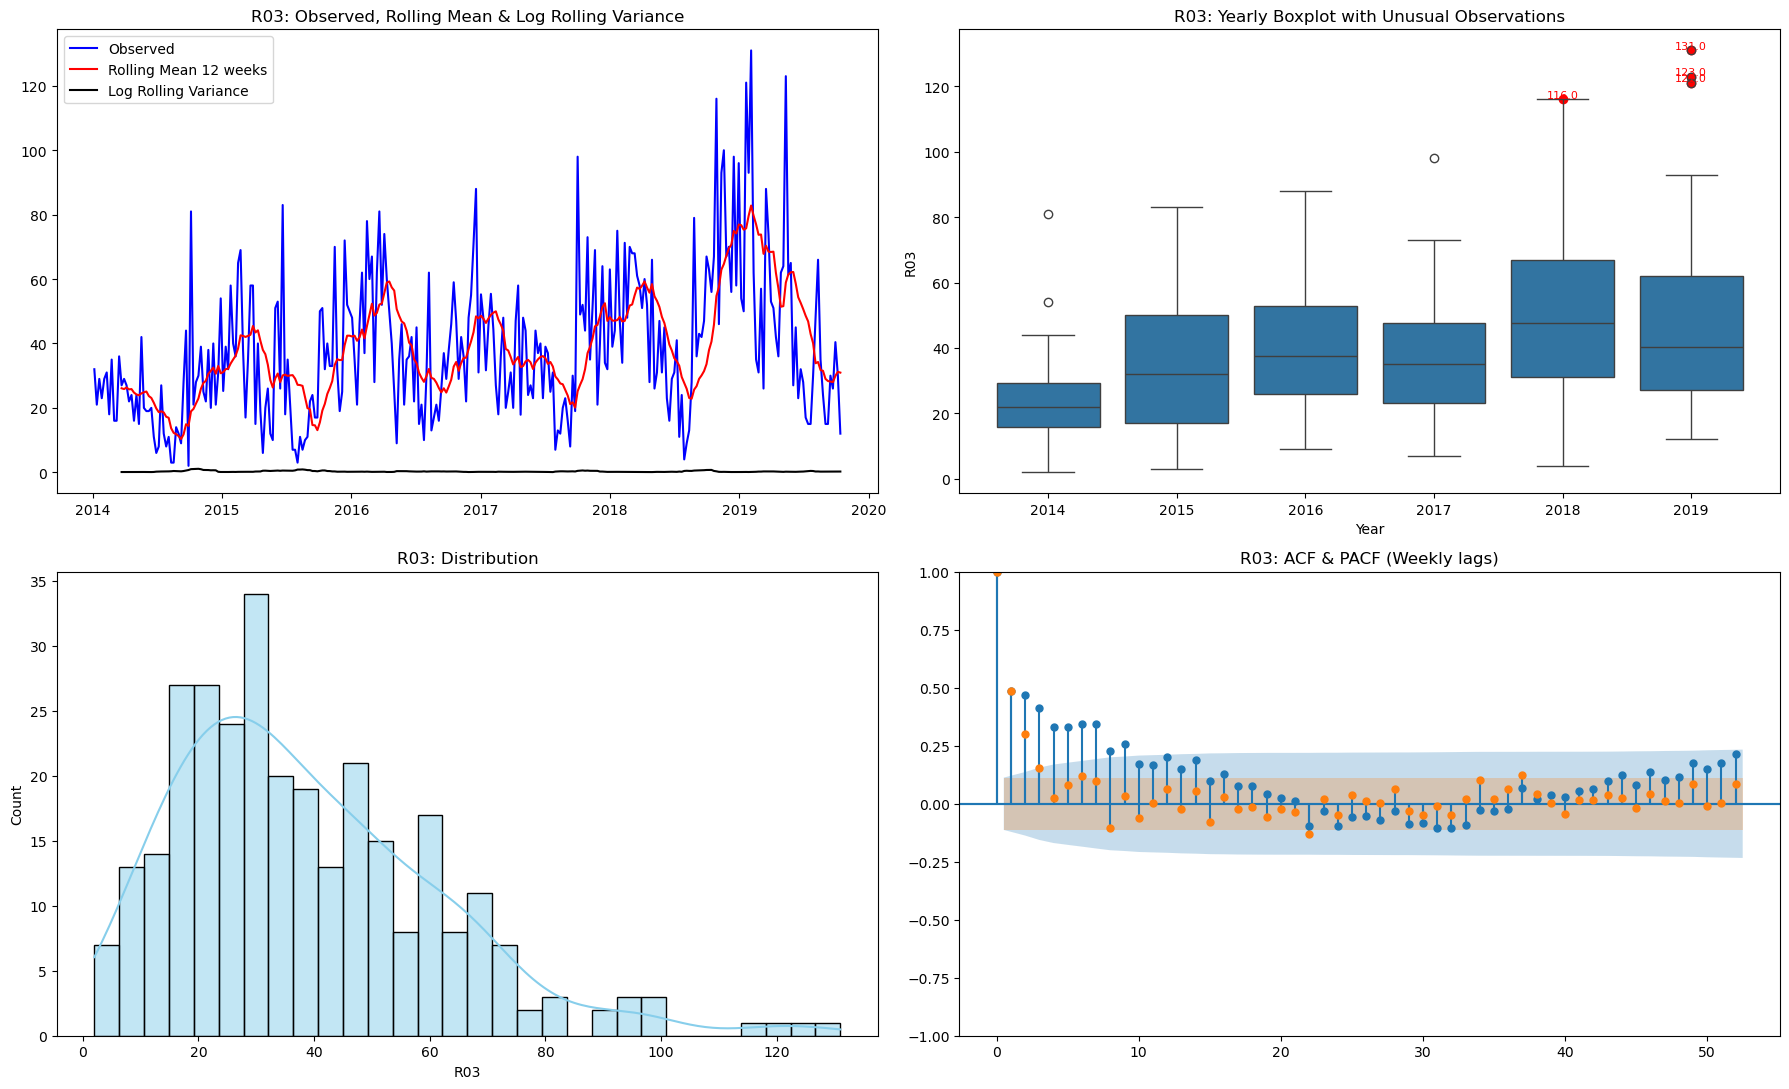

R03: Series is non-stationary ❌

Unusual observations for R03:
Date: 2018-10-28, Sales: 116.00
Date: 2019-01-20, Sales: 121.00
Date: 2019-02-03, Sales: 131.00
Date: 2019-05-12, Sales: 123.00

Right-skewed: more frequent lower sales, occasional high spikes
Light tails: sales more concentrated around mean

R03 weak correlation with previous week → mostly random week-to-week
R03 strong partial correlations at lags: [1 2]


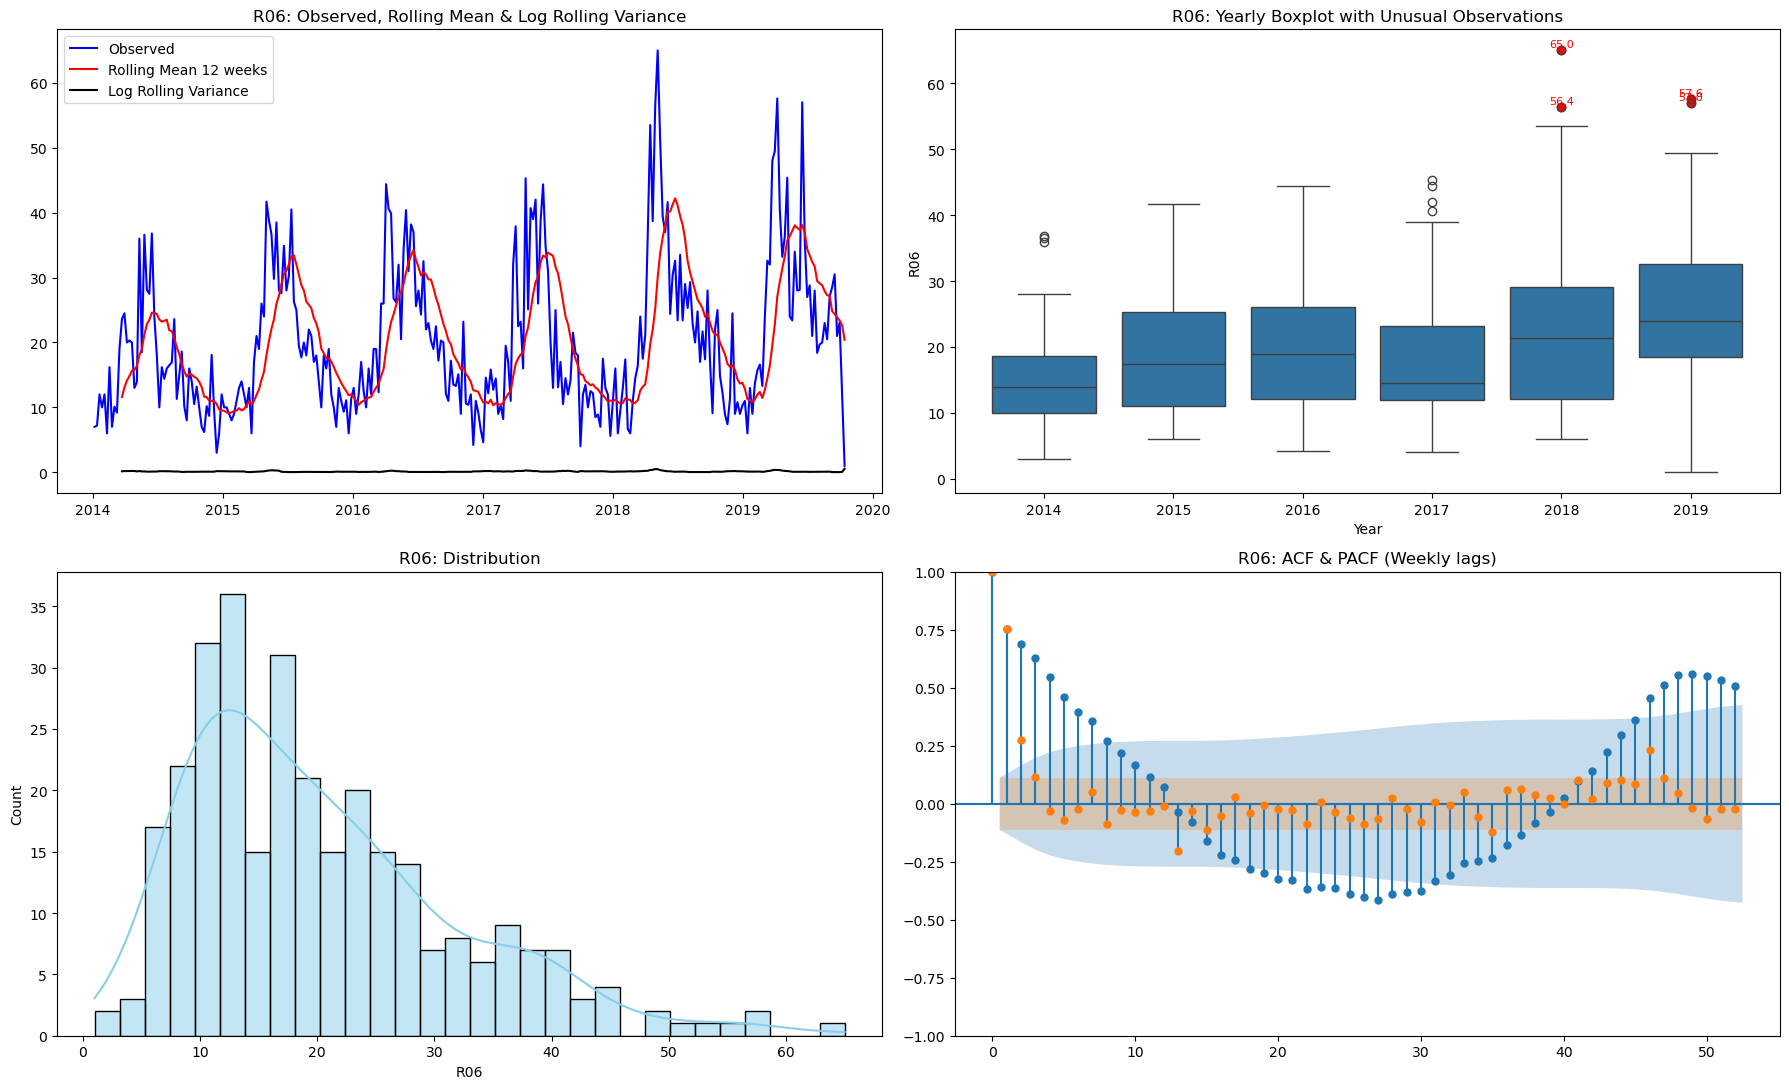

R06: Series is stationary ✅

Unusual observations for R06:
Date: 2018-04-29, Sales: 56.40
Date: 2018-05-06, Sales: 65.00
Date: 2019-04-07, Sales: 57.60
Date: 2019-06-16, Sales: 57.00

Right-skewed: more frequent lower sales, occasional high spikes
Light tails: sales more concentrated around mean

R06 has strong correlation with previous week → trend present
R06 strong partial correlations at lags: [1]
R06 shows signs of long-term seasonality


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

warnings.filterwarnings("ignore")  # ignore KPSS warnings

# Load weekly dataset
df = pd.read_csv("E://pharma_forcast//data//salesweekly_old.csv", parse_dates=["datum"])
df.set_index("datum", inplace=True)

categories = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]  # You can loop over all categories later

for cat in categories:
    series = df[cat]

    # -----------------------------
    # Rolling statistics (for visualization)
    # -----------------------------
    rolling_mean = series.rolling(window=12).mean()
    series_log = np.log1p(series)
    rolling_var_log = series_log.rolling(window=12).var()

    # -----------------------------
    # Prepare DataFrame for outliers
    # -----------------------------
    df_week = series.reset_index()
    df_week['datum'] = pd.to_datetime(df_week['datum'], dayfirst=True)
    df_week['Year'] = df_week['datum'].dt.year

    # Outlier detection using Z-score
    z_scores = np.abs(stats.zscore(df_week[cat]))
    df_week['Outlier'] = z_scores > 3
    outliers = df_week[df_week['Outlier']]

    # -----------------------------
    # Plots: Observed, rolling stats, boxplots
    # -----------------------------
    fig, axs = plt.subplots(2, 2, figsize=(18,11))

    # Observed + Rolling Mean + Log Rolling Variance
    axs[0,0].plot(series, label='Observed', color='blue')
    axs[0,0].plot(rolling_mean, label='Rolling Mean 12 weeks', color='red')
    axs[0,0].plot(rolling_var_log, label='Log Rolling Variance', color='black')
    axs[0,0].set_title(f"{cat}: Observed, Rolling Mean & Log Rolling Variance")
    axs[0,0].legend()

    # Yearly Boxplot with outliers labeled
    sns.boxplot(x='Year', y=cat, data=df_week, ax=axs[0,1])
    for idx, row in outliers.iterrows():
        axs[0,1].scatter(str(row['Year']), row[cat], color='red', marker='o')
        axs[0,1].text(str(row['Year']), row[cat]+0.5, f"{row[cat]:.1f}", color='red', fontsize=8, ha='center')
    axs[0,1].set_title(f"{cat}: Yearly Boxplot with Unusual Observations")

    # Histogram + KDE
    sns.histplot(series, kde=True, bins=30, color='skyblue', ax=axs[1,0])
    axs[1,0].set_title(f"{cat}: Distribution")

    # ACF & PACF (up to 52 lags)
    plot_acf(series, lags=52, ax=axs[1,1])
    plot_pacf(series, lags=52, ax=axs[1,1], method='ywm')
    axs[1,1].set_title(f"{cat}: ACF & PACF (Weekly lags)")

    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Stationarity Tests
    # -----------------------------
    adf_p = adfuller(series)[1]
    kpss_p = float(kpss(series, regression='c', nlags='auto')[1])

    if adf_p < 0.05 and kpss_p > 0.05:
        print(f"{cat}: Series is stationary ✅")
    else:
        print(f"{cat}: Series is non-stationary ❌")

    # -----------------------------
    # Outliers: print date & sales value
    # -----------------------------
    if not outliers.empty:
        print(f"\nUnusual observations for {cat}:")
        for idx, row in outliers.iterrows():
            print(f"Date: {row['datum'].date()}, Sales: {row[cat]:.2f}")
    else:
        print(f"\nNo outliers detected for {cat}.")
    
    print()
    skewness = series.skew()
    kurt = series.kurtosis()

    if skewness > 0.5:
        print("Right-skewed: more frequent lower sales, occasional high spikes")
    elif skewness < -0.5:
        print("Left-skewed: more frequent higher sales, occasional low dips")
    else:
        print("Relatively symmetric distribution")

    if kurt > 3:
        print("Heavy tails: extreme sales events more frequent than normal distribution")
    else:
        print("Light tails: sales more concentrated around mean")

    print()

    acf_vals = acf(series, nlags=60)
    pacf_vals = pacf(series, nlags=60, method='ywm')

    # Simple insights
    if acf_vals[1] > 0.7:
        print(f"{cat} has strong correlation with previous week → trend present")
    else:
        print(f"{cat} weak correlation with previous week → mostly random week-to-week")
    # PACF insights: strong partial correlations at low lags
    strong_pacf_lags = np.where(np.abs(pacf_vals[1:13]) > 0.3)[0] + 1  # check first 12 lags
    if len(strong_pacf_lags) > 0:
        print(f"{cat} strong partial correlations at lags: {strong_pacf_lags}")
    else:
        print(f"{cat} no strong partial correlations at early lags")
    # Threshold for high-lag ACF to consider possible seasonality
    acf_threshold = 0.3
    seasonal_lags = [lag for lag in range(45, 53) if acf_vals[lag] > acf_threshold]

    if seasonal_lags:
        print(f"{cat} shows signs of long-term seasonality")